In [2]:
import matplotlib.pyplot as plt
import pandas as pd

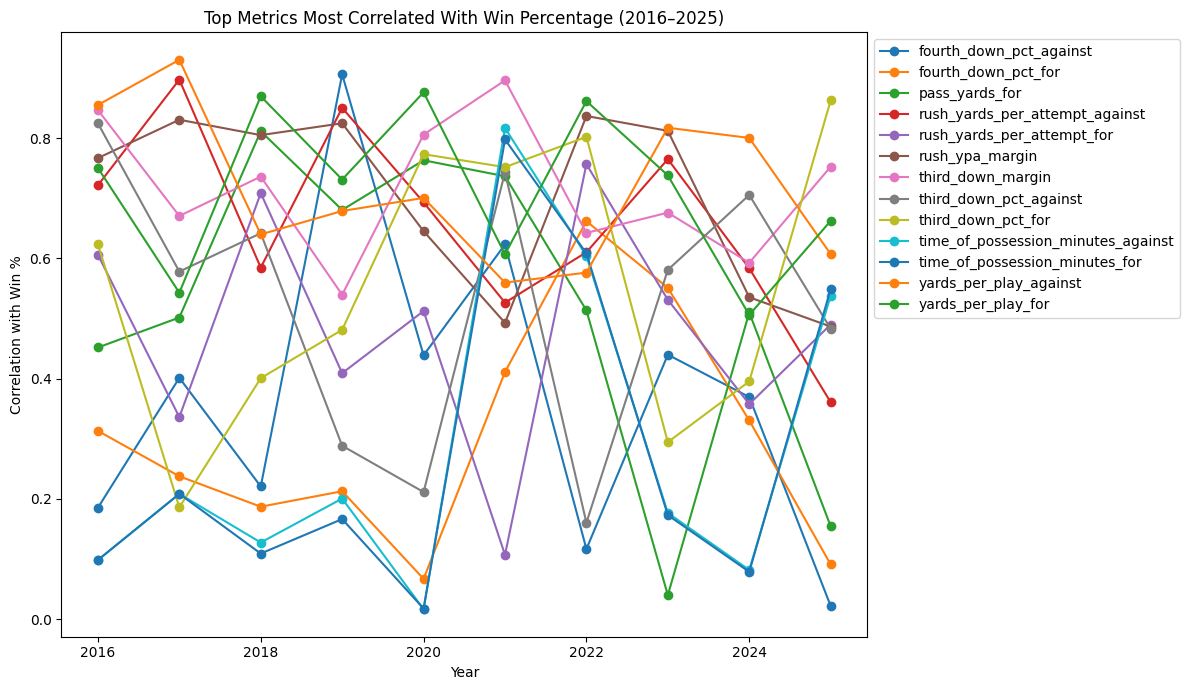

In [3]:
# ORIGINAL (from Morgan)
df = pd.read_csv('data/all_teams.csv')
years = sorted(df["year"].unique())
correlation_by_year = {}
top5_by_year = {}

for year in years:
    df_year = df[df["year"] == year]

    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c not in {
        "wins", "losses", "win_pct",
        "scoring_margin", "points_per_game_for", "points_per_game_against"
    }]

    corr = df_year[feature_cols + ["win_pct"]].corr()["win_pct"].drop("win_pct").abs()
    correlation_by_year[year] = corr

    top5_by_year[year] = corr.sort_values(ascending=False).head(5).index.tolist()

all_top_metrics = sorted(set(sum(top5_by_year.values(), [])))

plot_df = pd.DataFrame({
    year: correlation_by_year[year].reindex(all_top_metrics)
    for year in years
})

plt.figure(figsize=(12, 7))

for metric in all_top_metrics:
    plt.plot(years, plot_df.loc[metric], marker="o", label=metric)

plt.title("Top Metrics Most Correlated With Win Percentage (2016–2025)")
plt.xlabel("Year")
plt.ylabel("Correlation with Win %")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [4]:
import plotly.graph_objs as go

df = pd.read_csv('data/all_teams.csv')
years = sorted(df["year"].unique())
correlation_by_year = {}
top5_by_year = {}

for year in years:
    df_year = df[df["year"] == year]

    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c not in {
        "wins", "losses", "win_pct",
        "scoring_margin", "points_per_game_for", "points_per_game_against"
    }]

    corr = df_year[feature_cols + ["win_pct"]].corr()["win_pct"].drop("win_pct").abs()
    correlation_by_year[year] = corr

    top5_by_year[year] = corr.sort_values(ascending=False).head(5).index.tolist()

all_top_metrics = sorted(set(sum(top5_by_year.values(), [])))

plot_df = pd.DataFrame({
    year: correlation_by_year[year].reindex(all_top_metrics)
    for year in years
})

# Construct Plotly traces
traces = []
for metric in all_top_metrics:
    traces.append(go.Scatter(
        x=years,
        y=plot_df.loc[metric],
        mode='lines+markers',
        name=metric
    ))

layout = go.Layout(
    title="Top Metrics Most Correlated With Win Percentage (2016–2025)",
    xaxis=dict(title='Year'),
    yaxis=dict(title='Correlation with Win %'),
    legend=dict(
        orientation="v",
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top'
    ),
    margin=dict(r=150, t=60)
)

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [ ]:
# Interactive Version
import plotly.graph_objs as go

df = pd.read_csv('data/all_teams.csv')
years = sorted(df["year"].unique())
correlation_by_year = {}
top5_by_year = {}

for year in years:
    df_year = df[df["year"] == year]

    numeric_cols = df.select_dtypes(include=["number"]).columns.tolist()
    feature_cols = [c for c in numeric_cols if c not in {
        "wins", "losses", "win_pct",
        "scoring_margin", "points_per_game_for", "points_per_game_against"
    }]

    corr = df_year[feature_cols + ["win_pct"]].corr()["win_pct"].drop("win_pct").abs()
    correlation_by_year[year] = corr

    top5_by_year[year] = corr.sort_values(ascending=False).head(5).index.tolist()

all_top_metrics = sorted(set(sum(top5_by_year.values(), [])))

plot_df = pd.DataFrame({
    year: correlation_by_year[year].reindex(all_top_metrics)
    for year in years
})

from collections import Counter
metric_counts = Counter(sum(top5_by_year.values(), []))
max_count = max(metric_counts.values())

y_min = plot_df.min().min()
y_max = plot_df.max().max()
y_range = [max(0, y_min - 0.05), min(1, y_max + 0.05)]

traces = []
for metric in all_top_metrics:
    freq = metric_counts[metric]
    is_key = freq == max_count

    line_props = dict(
        width=4 if is_key else 2,
        color='crimson' if is_key else 'gray'
    )

    marker_props = dict(
        size=10 if is_key else 6,
        color='crimson' if is_key else 'gray'
    )

    traces.append(go.Scatter(
        x=years,
        y=plot_df.loc[metric],
        mode='lines+markers',
        name=metric,
        line=line_props,
        marker=marker_props,
        hovertemplate=(
            f"<b>{metric}</b><br>Correlation: %{{y:.2f}}"
            + ("<br><i>Key Metric</i>" if is_key else "")
            + "<extra></extra>"
        ),
        opacity=1.0 if is_key else 0.6
    ))

layout = go.Layout(
    title="Third Down Margin Continues to be a Key Factor For Winning CFB Games (2016–2025)",
    xaxis=dict(title='Year'),
    yaxis=dict(
        title='Correlation with Win %',
        range=y_range,
        fixedrange=True
    ),
    legend=dict(
        orientation="v",
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1,
    ),
    margin=dict(r=150, t=60),
    hovermode='x unified',
    height=500
)

fig = go.Figure(data=traces, layout=layout)

fig.update_layout(
    legend_title_text='Metric (Key metrics in red)',
    legend_itemclick="toggleothers",
    legend_itemdoubleclick="toggle"
)

fig.show()
